In [4]:
#install and import libraries

import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#Filter for Data Analysts Job Postings in United States
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

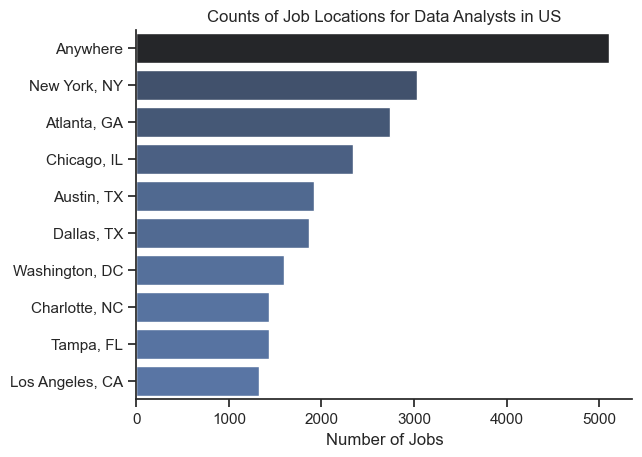

In [ ]:
#Plot
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

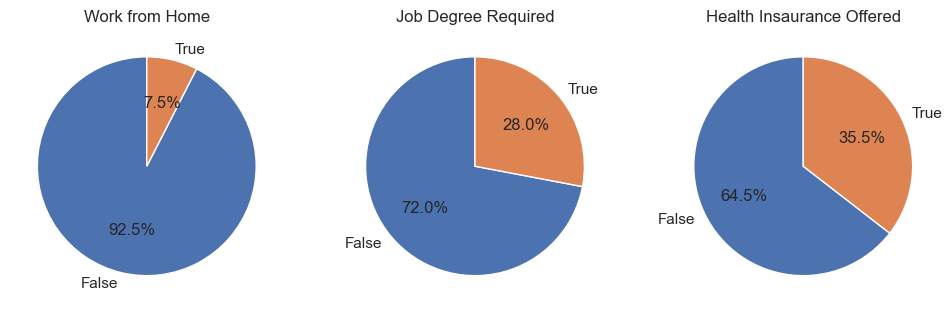

In [ ]:
#Job Listings with 'Work from Home', 'Job Degree Required' and 'Health Insaurance Offered'
fig, ax= plt.subplots(1,3)
fig.set_size_inches(12, 8)
dict_colmn = {
    "job_work_from_home" : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Required',
    'job_health_insurance' : 'Health Insaurance Offered'
}
for i, (column, title) in enumerate(dict_colmn.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True']),
    ax[i].set_title(title)

plt.show()

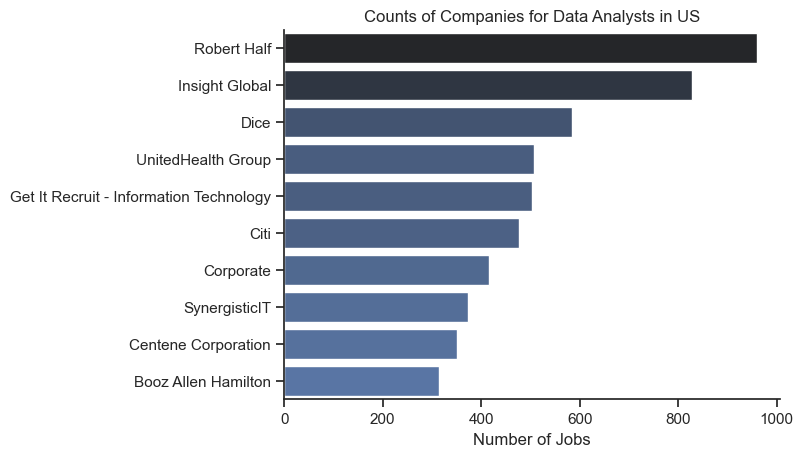

In [ ]:
#Counts of Companies for Data Analysts in US
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysts in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

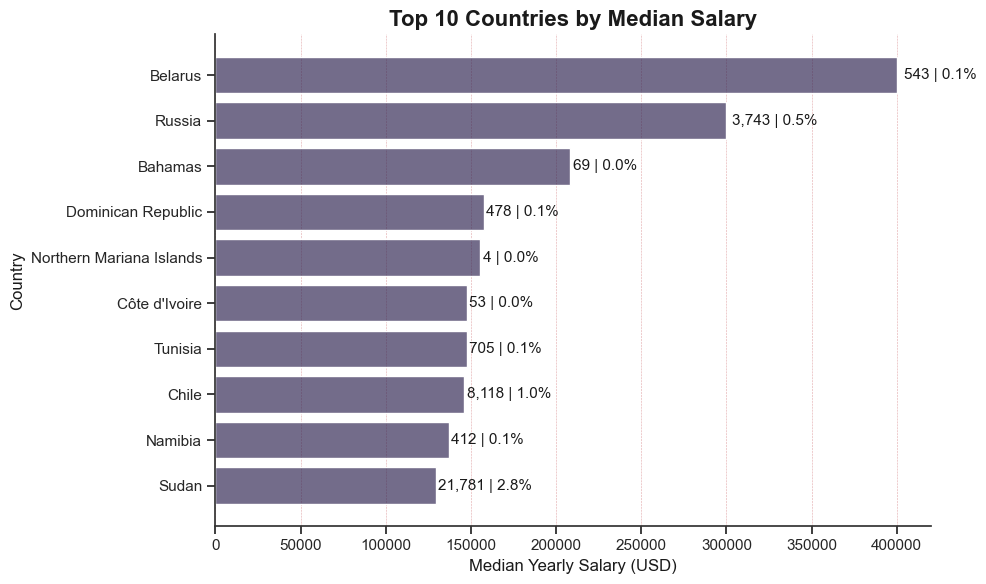

In [ ]:
#Top 10 Countries with Median Salaries
# Median salary by country
country_salary = (
    df.groupby('job_country')['salary_year_avg']
      .median()
      .dropna()
      .sort_values(ascending=False)
)

# Count of records per country
country_counts = df['job_country'].value_counts()

# Align counts to salary index (top countries)
top = country_salary.head(10)
top_counts = country_counts.loc[top.index]

# Percent of total listings
total_listings = df.shape[0]
top_percent = (top_counts / total_listings) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_color = "#302552AC"

bars = ax.barh(top.index, top.values, color=bar_color)

# Professional styling
ax.set_title('Top 10 Countries by Median Salary', fontsize=16, fontweight='bold', color='#1A1A1A')
ax.set_xlabel('Median Yearly Salary (USD)', fontsize=12, color='#1A1A1A')
ax.set_ylabel('Country', fontsize=12, color='#1A1A1A')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')

ax.grid(axis='x', linestyle='--', linewidth=0.4, color='r', alpha=0.5)
ax.invert_yaxis()

# Add annotations: count + percent
for bar, count, pct in zip(bars, top_counts, top_percent):
    width = bar.get_width()
    label = f"{count:,} | {pct:.1f}%"
    ax.text(
        width + (width * 0.01),  # just outside the bar
        bar.get_y() + bar.get_height()/2,
        label,
        va='center',
        fontsize=11,
        color='#1A1A1A'
    )
plt.tight_layout()
plt.show()
